<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.4 MB/s 
     |████████████████████████████████| 9.8 MB 4.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
dataset=pd.read_csv('/content/AirPassengers.csv')

In [ ]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
time_series = dataset['#Passengers']

In [ ]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
time_series[1]

118

In [ ]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [ ]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

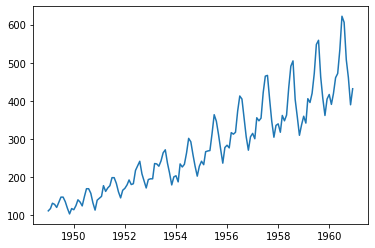

In [ ]:
plt.plot(time_series)

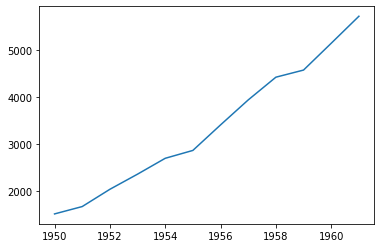

In [ ]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

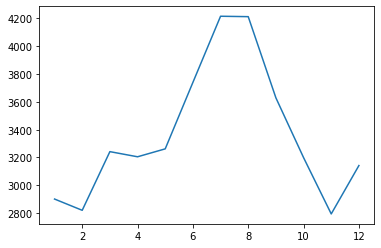

In [ ]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

In [ ]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

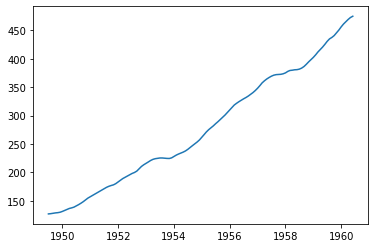

In [ ]:
plt.plot(tendencia)

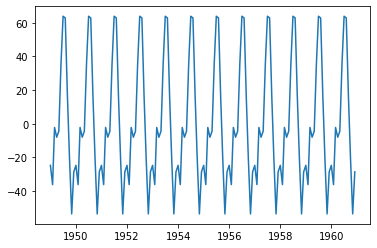

In [ ]:
plt.plot(sazonal)

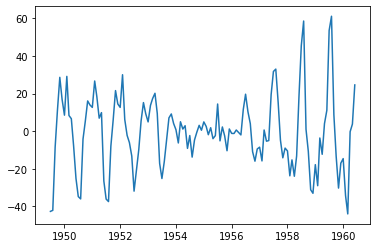

In [ ]:
plt.plot(aleatorio)

In [ ]:
model = auto_arima(time_series)

In [ ]:
model.order

(4, 1, 3)

In [ ]:
predictions = model.predict(n_periods=12)

In [ ]:
predictions

array([467.57377609, 490.49451051, 509.13689043, 492.554729  ,
       495.30595719, 475.94780752, 476.33984666, 475.55214197,
       472.35381478, 483.88965828, 475.57017213, 485.92152004])

In [ ]:
len(time_series)

144

In [ ]:
train = time_series[:130]

In [ ]:
test = time_series[130:]

In [ ]:
model2 = auto_arima(train, suppress_warnings=True)

In [ ]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690514
1959-12-01,334.857455
1960-01-01,342.488598
1960-02-01,375.944537
1960-03-01,424.126295
1960-04-01,473.151455
1960-05-01,510.388393
1960-06-01,527.724259
1960-07-01,523.268346


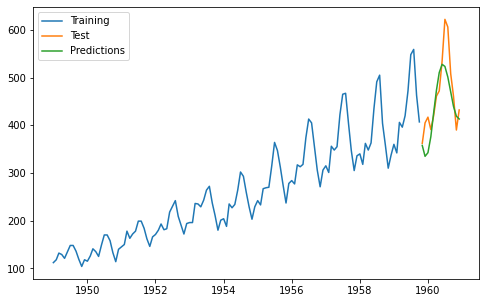

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();